In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brentq
import Flow_solutions as FS
import astropy
import tools
import matplotlib.pyplot as plt

# Define all the functions

In [8]:
def get_vs(T,mu):
    """
    Calculates the isothermal sound speed (vs).

    Parameters
    ----------
    T : float
        The isothermal temperature of the gas in [K].
    mu : float
        The mean molecular weight in [amu].

    Returns
    -------
    vs : float
        Isothermal sound speed in [m/s].
    """
    
    # import constants
    kB = tools.kB
    u_amu = tools.u

    # calculate sound speed
    vs = np.sqrt((T*kB)/(u_amu*mu))

    return vs

def get_Rs(Mp,vs):
    """
    Calculates the sonic radius (rs).

    Parameters
    ----------
    Mp : float
        The mass of the planet in [kg].
    vs : float
        The isothermal sound speed in [m/s].

    Returns
    -------
    Rs : float
        Sonic radius in [m].
    """

    # import constants
    G = tools.G

    # calculate sonic radius
    Rs = G*Mp/(2*vs**2)

    return Rs

# Define model parameters

In [ ]:
# Parameters for HD 209458b
Mp = 0.07*tools.MJ  # Planet mass in [kg]
Rp = 0.37*tools.RJ  # Planet radius in [m]
mu = 1.08  # mean molecular weight of the bolometric heated region, assumed to be fully molecular

kappa = 0.001 # opacity at the photosphere in [m^2/kg]
FXUV = 0.45 #[W/m2]


# Define three isothermal three we want to investigate and calculate their sonic speed and sonic point
T_1 = 3300 
T_2 = 5000 
T_3 = 6000 

vs_1 = get_vs(T_1,mu)
vs_2 = get_vs(T_2,mu)
vs_3 = get_vs(T_3,mu)

Rs_1 = get_Rs(Mp,vs_1)
Rs_2 = get_Rs(Mp,vs_2)
Rs_3 = get_Rs(Mp,vs_3)

In [5]:
# Define the radial domain array 'r':
# Start the array at planet's radius
# and extend it far past the sonic point (e.g., 8 * RJ)
R_start = 1*Rp
R_end = 15*Rp

# Create 250 logarithmically spaced points between the start and end radii
# This ensures good resolution near the planet (subsonic region) and far out.
R_test = np.logspace(np.log10(R_start), np.log10(R_end), 250)

In [6]:
# v = FS.FlowSolutions.get_parker_wind(R_test, vs,rs)

v1 = FS.FlowSolutions.get_parker_wind(R_test, vs_1,Rs_1)
v2 = FS.FlowSolutions.get_parker_wind(R_test, vs_2,Rs_2)
v3 = FS.FlowSolutions.get_parker_wind(R_test, vs_3,Rs_3)

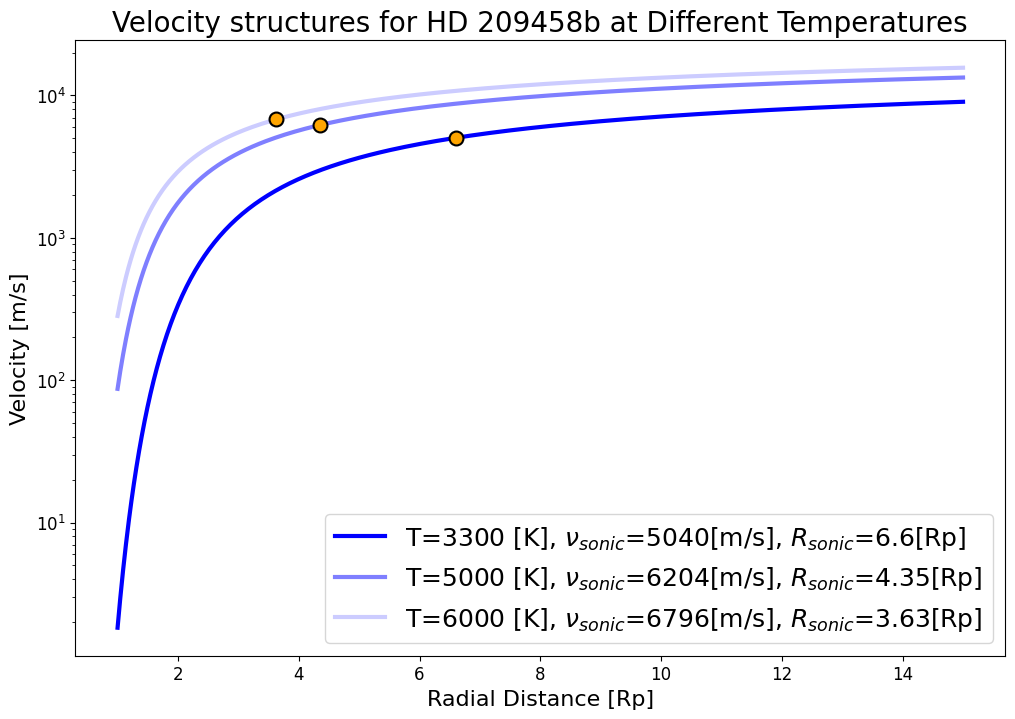

In [7]:
# Plotting the velocity structures

plt.figure(figsize=(12, 8))
plt.plot(R_test/Rp, v1, color='blue', label=fr'T=3300 [K], $\nu_{{sonic}}$={round(vs_1)}[m/s], $R_{{sonic}}$={round(Rs_1/Rp,2)}[Rp]', linewidth=3, alpha=1)
plt.plot(R_test/Rp, v2, color='blue', label=fr'T=5000 [K], $\nu_{{sonic}}$={round(vs_2)}[m/s], $R_{{sonic}}$={round(Rs_2/Rp,2)}[Rp]', linewidth=3, alpha=0.5)
plt.plot(R_test/Rp, v3, color='blue', label=fr'T=6000 [K], $\nu_{{sonic}}$={round(vs_3)}[m/s], $R_{{sonic}}$={round(Rs_3/Rp,2)}[Rp]', linewidth=3, alpha=0.2)


# Plot the sonic speed and sonic radii
plt.plot(Rs_1/Rp, vs_1, 'o', markersize=10, color='orange', markeredgecolor='black', markeredgewidth=1.5)
plt.plot(Rs_2/Rp, vs_2, 'o', markersize=10, color='orange', markeredgecolor='black', markeredgewidth=1.5)
plt.plot(Rs_3/Rp, vs_3, 'o', markersize=10, color='orange', markeredgecolor='black', markeredgewidth=1.5)


# --- Increased Tick Label Font Size (The numbers on the axes) ---
plt.tick_params(axis='both', which='major', labelsize=12) # For major ticks (e.g., 1.0, 10.0)
plt.tick_params(axis='both', which='minor', labelsize=10) # For minor ticks on the log scale

plt.title('Velocity structures for HD 209458b at Different Temperatures', fontsize=20)
plt.yscale('log')
plt.xlabel(r'Radial Distance [Rp]', fontsize=16)
plt.ylabel(r'Velocity [m/s]', fontsize=16)
plt.legend(fontsize=18)
plt.show()